In [1]:
from scipy import stats

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import os

import graphviz
from graphviz import Graph

import env
import acquire
import prepare

import warnings
warnings.filterwarnings("ignore")

## DECISION TREE EXERCISES

### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
df = acquire.get_titanic_data()

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [3]:
df = prepare.clean_data(df)

In [4]:
df.drop(columns = ["sex","embark_town","passenger_id"], inplace = True)

In [5]:
train,validate,test= prepare.train_validate_test_split(df,target = "survived", seed = 174)

In [6]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [7]:
model = DummyClassifier(strategy='most_frequent')

In [8]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
102,0,1,21.0,0,1,77.2875,0,1,0,1
34,0,1,28.0,1,0,82.1708,0,1,0,0
176,0,3,28.0,3,1,25.4667,0,1,0,1
626,0,2,57.0,0,0,12.3500,1,1,1,0
872,0,1,33.0,0,0,5.0000,1,1,0,1


In [9]:
model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [10]:
accuracy = round(model.score(X_train, y_train), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.62


##### THIS IS OUR BASELINE ACCURACY LETS SEE IF WE CAN BEAT IT (0.62)

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [11]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [12]:
clf = clf.fit(X_train, y_train)

In [13]:
dot_data = export_graphviz(decision_tree = clf,feature_names= X_train.columns)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [14]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [15]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.69879518, 0.30120482],
       [0.69879518, 0.30120482],
       [0.89351852, 0.10648148],
       [0.89351852, 0.10648148],
       [0.89351852, 0.10648148]])

In [16]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [17]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [18]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index=["died","lived"], columns=["died","lived"])

,died,lived
died,275,32
lived,49,142


In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       307
           1       0.82      0.74      0.78       191

    accuracy                           0.84       498
   macro avg       0.83      0.82      0.82       498
weighted avg       0.84      0.84      0.84       498



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [20]:
accuracy = round(clf.score(X_validate, y_validate), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.79


In [21]:
y_pred = clf.predict(X_validate)

In [22]:
validate['prediction'] = clf.predict(X_validate)

In [23]:
print(classification_report(validate.survived, validate.prediction, zero_division=True))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       132
           1       0.76      0.66      0.71        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.79      0.79      0.79       214



In [24]:
cnf_matrix = confusion_matrix(y_validate,y_pred)

In [25]:
cnf_matrix

array([[115,  17],
       [ 28,  54]])

In [26]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [27]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [28]:
#TRUE NEGATIVE RATE
TNR[1]

0.8712121212121212

In [29]:
#FALSE POSITIVE RATE
FPR[1]

0.12878787878787878

### 5. Run through steps 2-4 using a different max_depth value.

In [30]:
clf_2 = DecisionTreeClassifier(max_depth=5, random_state=123)

In [31]:
clf_2 = clf_2.fit(X_train, y_train)

In [32]:
dot_data = export_graphviz(decision_tree = clf_2,feature_names= X_train.columns)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True)

'telco_decision_tree.pdf'

In [33]:
y_pred = clf_2.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [34]:
y_pred_proba = clf_2.predict_proba(X_train)
y_pred_proba[0:5]

array([[1.        , 0.        ],
       [0.58181818, 0.41818182],
       [0.89655172, 0.10344828],
       [1.        , 0.        ],
       [0.92307692, 0.07692308]])

In [35]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.86


In [36]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index=["died","lived"], columns=["died","lived"])

,died,lived
died,293,14
lived,57,134


In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       307
           1       0.91      0.70      0.79       191

    accuracy                           0.86       498
   macro avg       0.87      0.83      0.84       498
weighted avg       0.86      0.86      0.85       498



In [38]:
accuracy = round(clf_2.score(X_train, y_train), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.86


In [39]:
train['prediction'] = model.predict(X_train)

In [40]:
pd.DataFrame(classification_report(train.survived, train.prediction, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.616466,1.000000,0.762733,307.000000
1,0.000000,0.000000,0.000000,191.000000
accuracy,0.616466,0.616466,0.616466,0.616466
macro avg,0.308233,0.500000,0.381366,498.000000
weighted avg,0.380030,0.616466,0.470199,498.000000


### 6. Which model performs better on your in-sample data?

In [41]:

print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [42]:
# model with 5 splits
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf_2.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [43]:
# baseline model
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(model.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.62


## PART 2

### 1. Work through these same exercises using the Telco dataset.

In [44]:
def get_telco_data():
    filename = "telco_churn.csv"

    if os.path.isfile("telco_churn.csv"):
        return pd.read_csv("telco_churn.csv")
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('''
SELECT *
FROM customers
JOIN contract_types ON contract_types.contract_type_id = customers.contract_type_id
JOIN internet_service_types ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
JOIN payment_types ON payment_types.payment_type_id = customers.payment_type_id;
''', acquire.get_connection("telco_churn"))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv("telco_churn.csv")

        # Return the dataframe to the calling code
        return df

In [45]:
df = get_telco_data()

In [46]:
df["partner"] = df.partner.replace(to_replace = ["Yes","No"],value = [1,0])
df["dependents"] = df.dependents.replace(to_replace = ["Yes","No"],value = [1,0])
df["churn"] = df.churn.replace(to_replace = ["Yes","No"],value = [1,0])
df["paperless_billing"] = df.paperless_billing.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["tech_support"] = df.tech_support.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["device_protection"] = df.device_protection.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["online_backup"] = df.online_backup.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["online_security"] = df.online_security.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["streaming_tv"] = df.streaming_tv.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["streaming_movies"] = df.streaming_movies.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["phone_service"] = df.phone_service.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
df["multiple_lines"] = df.multiple_lines.replace(to_replace = ["Yes","No","No phone service"],value = [1,0,0])

In [47]:
df.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0,0016-QLJIS,Female,0,1,1,65,1,1,1,...,2,90.45,5957.9,0,3,Two year,1,DSL,2,Mailed check
1,1,0017-DINOC,Male,0,0,0,54,0,0,1,...,4,45.20,2460.55,0,3,Two year,1,DSL,4,Credit card (automatic)
2,2,0019-GFNTW,Female,0,0,0,56,0,0,1,...,3,45.05,2560.1,0,3,Two year,1,DSL,3,Bank transfer (automatic)
3,3,0056-EPFBG,Male,0,1,1,20,0,0,1,...,4,39.40,825.4,0,3,Two year,1,DSL,4,Credit card (automatic)
4,4,0078-XZMHT,Male,0,1,0,72,1,1,1,...,3,85.15,6316.2,0,3,Two year,1,DSL,3,Bank transfer (automatic)


In [48]:
df_dummy = pd.get_dummies(df[["gender","multiple_lines","contract_type","internet_service_type","payment_type"]])

In [49]:
df = pd.concat([df, df_dummy], axis=1)

In [50]:
df.drop(columns = ["gender","customer_id",
                   "multiple_lines",
                   "contract_type",
                   "internet_service_type",
                   "payment_type",
                   "total_charges",
                   'internet_service_type_id',
                   "contract_type_id",
                   "payment_type_id",
                  "contract_type_id.1",
                   "internet_service_type_id.1",
                   "payment_type_id.1",
                   "Unnamed: 0"],inplace = True)

In [51]:
df["total_charges_clean"] = df.monthly_charges * df.tenure

In [52]:
len(y_train)

498

In [54]:
train,validate,test= prepare.train_validate_test_split(df, target = "churn", seed = 174)

In [55]:
train.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'monthly_charges', 'churn', 'gender_Female', 'gender_Male',
       'contract_type_Month-to-month', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_DSL',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Bank transfer (automatic)',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'total_charges_clean'],
      dtype='object')

In [56]:
X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [57]:
model = DummyClassifier(strategy='most_frequent')

In [58]:
model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [59]:
accuracy = round(model.score(X_train, y_train), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.73


##### OUR MODEL TO BEAT IS (.73)

In [60]:
clf = DecisionTreeClassifier(max_depth=6, random_state=123)

In [61]:
clf = clf.fit(X_train, y_train)

In [62]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 0])

In [63]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.83333333, 0.16666667],
       [0.82142857, 0.17857143],
       [0.72727273, 0.27272727],
       [0.48430493, 0.51569507],
       [0.57692308, 0.42307692]])

In [64]:
clf

DecisionTreeClassifier(max_depth=6, random_state=123)

In [65]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.79


In [66]:
dot_data = export_graphviz(decision_tree = clf,feature_names= X_train.columns)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True)

'telco_decision_tree.pdf'

In [67]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index=["didntchurn","churned"], columns=["didntchurn","churned"])

,didntchurn,churned
didntchurn,2492,405
churned,354,692


In [68]:
train["predicted"] = y_pred

In [69]:
pd.DataFrame(classification_report(train.churn, train.predicted, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.875615,0.860200,0.867839,2897.000000
1,0.630811,0.661568,0.645824,1046.000000
accuracy,0.807507,0.807507,0.807507,0.807507
macro avg,0.753213,0.760884,0.756831,3943.000000
weighted avg,0.810673,0.807507,0.808943,3943.000000


In [70]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


### 2. Experiment with this model on other datasets with a higher number of output classes.

## RANDOM FOREST EXERCISES

#### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [71]:
df = acquire.get_titanic_data()

In [72]:
df = prepare.clean_data(df)

In [73]:
df.drop(columns = ["sex","embark_town","passenger_id"], inplace = True)

In [74]:
train,validate,test= prepare.train_validate_test_split(df, target = "survived", seed = 123)

In [75]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [77]:
rf = RandomForestClassifier(bootstrap = True,
                           class_weight = None,
                           criterion = "gini",
                           min_samples_leaf = 1,
                           n_estimators = 100,
                           max_depth = 10,
                           random_state = 123)

In [78]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [79]:
print(rf.feature_importances_)

[0.08948574 0.2187192  0.05511936 0.02846755 0.23923619 0.01805384
 0.31226911 0.01487009 0.02377892]


In [80]:
y_pred = rf.predict(X_train)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [81]:
accuracy = round(rf.score(X_train, y_train), 2)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.97


In [82]:
pd.DataFrame(confusion_matrix(y_train, y_pred),index = ["passed","lived"], columns = ["passed","lived"])

,passed,lived
passed,307,0
lived,15,176


In [83]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       307
           1       1.00      0.92      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



In [84]:
accuracy = round(rf.score(X_validate, y_validate), 2)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.81


#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [85]:
cnf_matrix = confusion_matrix(y_train,y_pred)

In [86]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [87]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [88]:
#TRUE POSITIVE RATE
TPR[1]

0.9214659685863874

In [89]:
#FALSE POSITIVE RATE
FPR[0]

0.07853403141361257

In [90]:
#FALSE NEGATIVE RATE
FNR[0]

0.0

In [91]:
#TRUE NEGATIVE RATE
TNR[1]

1.0

In [92]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       307
           1       1.00      0.92      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



#### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [93]:
rf_1 = RandomForestClassifier(bootstrap = True,
                           class_weight = None,
                           criterion = "gini",
                           min_samples_leaf = 15,
                           n_estimators = 200,
                           max_depth = 3,
                           random_state = 123)

In [94]:
rf_1.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=15, n_estimators=200,
                       random_state=123)

In [95]:
y_pred = rf_1.predict(X_train)

In [96]:
accuracy = round(rf_1.score(X_train, y_train), 2)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.83


In [97]:
accuracy = round(rf_1.score(X_validate, y_validate), 2)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.8


#### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [98]:
# THE RATES WERE SIMILAR IN BOTH OF MY TESTED MODELS, THEY BOTH PREFORM WITH AN ACCURACY NEAR .8 , BUT I BELIEVE THAT
# THEY GET TO THAT CONCLUSION IN DIFFERENT WAYS THE ONE WITH A LARGE AMOUNT OF MIN LEAF'S HAS 3 DIFFERENT TREES
# WHILE THE FIRST MODEL HAS 10 TREES BUT THEY ALL SPLIT ON ON DECISION POINT,
# BUT BOTH ARE PROBABLY VALIDATING ON SIMILAR METRICS WHICH RESULTS IN SIMILAR END POINTS FOR MODEL ACCURACY ON
# THE VALIDATE DATA

## K-Nearest Neighbors exercises

#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [99]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [100]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
y_pred = knn.predict(X_train)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [102]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [103]:
print(confusion_matrix(y_train, y_pred))

[[256  51]
 [ 52 139]]


In [104]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.831169,0.731579,0.793173,0.781374,0.792973
recall,0.833876,0.727749,0.793173,0.780812,0.793173
f1-score,0.832520,0.729659,0.793173,0.781090,0.793069
support,307.000000,191.000000,0.793173,498.000000,498.000000


#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [105]:
cnf_matrix = confusion_matrix(y_train,y_pred)

In [106]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [107]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [108]:
# TRUE NEGATIVE RATE
TNR[0]

0.7277486910994765

In [109]:
# TRUE POSITIVE RATE
TPR[0]

0.8338762214983714

In [110]:
# FALSE NEGATIVE RATE
FNR[0]

0.16612377850162866

In [111]:
# FALSE POSITIVE RATE
FPR[0]

0.27225130890052357

In [112]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.831169,0.731579,0.793173,0.781374,0.792973
recall,0.833876,0.727749,0.793173,0.780812,0.793173
f1-score,0.832520,0.729659,0.793173,0.781090,0.793069
support,307.000000,191.000000,0.793173,498.000000,498.000000


#### 4. Run through steps 2-4 setting k to 10

In [113]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [114]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [115]:
y_pred = knn.predict(X_train)

In [116]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.75


In [117]:
print(confusion_matrix(y_train, y_pred))

[[276  31]
 [ 95  96]]


In [118]:
cnf_matrix = confusion_matrix(y_train,y_pred)

In [119]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [120]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [121]:
# TRUE NEGATIVE RATE
TNR[0]

0.5026178010471204

In [122]:
# TRUE POSITIVE RATE
TPR[0]

0.8990228013029316

In [123]:
# FALSE NEGATIVE RATE
FNR[0]

0.10097719869706841

In [124]:
# FALSE POSITIVE RATE
FPR[0]

0.4973821989528796

In [125]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.743935,0.755906,0.746988,0.749920,0.748526
recall,0.899023,0.502618,0.746988,0.700820,0.746988
f1-score,0.814159,0.603774,0.746988,0.708966,0.733469
support,307.000000,191.000000,0.746988,498.000000,498.000000


#### 5. Run through setps 2-4 setting k to 20

In [126]:
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [127]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [128]:
y_pred = knn.predict(X_train)

In [129]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.72


In [130]:
print(confusion_matrix(y_train, y_pred))

[[269  38]
 [103  88]]


In [131]:
cnf_matrix = confusion_matrix(y_train,y_pred)

In [132]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [133]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [134]:
# TRUE NEGATIVE RATE
TNR[0]

0.4607329842931937

In [135]:
# TRUE POSITIVE RATE
TPR[0]

0.8762214983713354

In [136]:
# FALSE NEGATIVE RATE
FNR[0]

0.1237785016286645

In [137]:
# FALSE POSITIVE RATE
FPR[0]

0.5392670157068062

In [138]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.723118,0.698413,0.716867,0.710765,0.713643
recall,0.876221,0.460733,0.716867,0.668477,0.716867
f1-score,0.792342,0.555205,0.716867,0.673773,0.701392
support,307.000000,191.000000,0.716867,498.000000,498.000000


#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

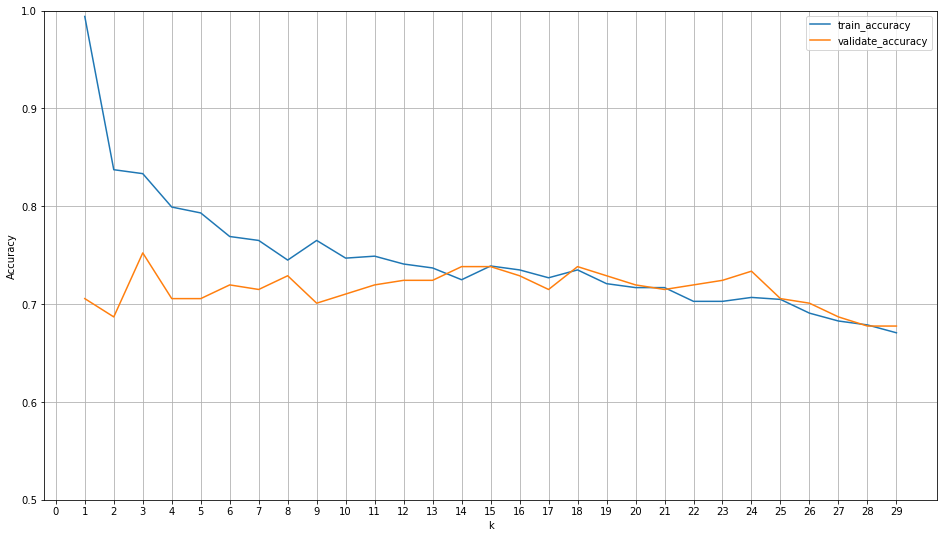

In [139]:
metrics = []

# loop through different values of k
for k in range(1, 30):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylim(0.50, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,30,1))
plt.grid()

In [140]:
# The highest accuracy for in sample data is a k value that is lower so for our 3 models that would be
# the model with a k value of 5

# the reason that the lower k value works better on in sample data is because with a lower k value you can get
# a better fit model that will fit our in sample to get the highest value possible, while it might not be the best
# for out of sample data.

#### 7. Which model performs best on our out-of-sample data from validate?

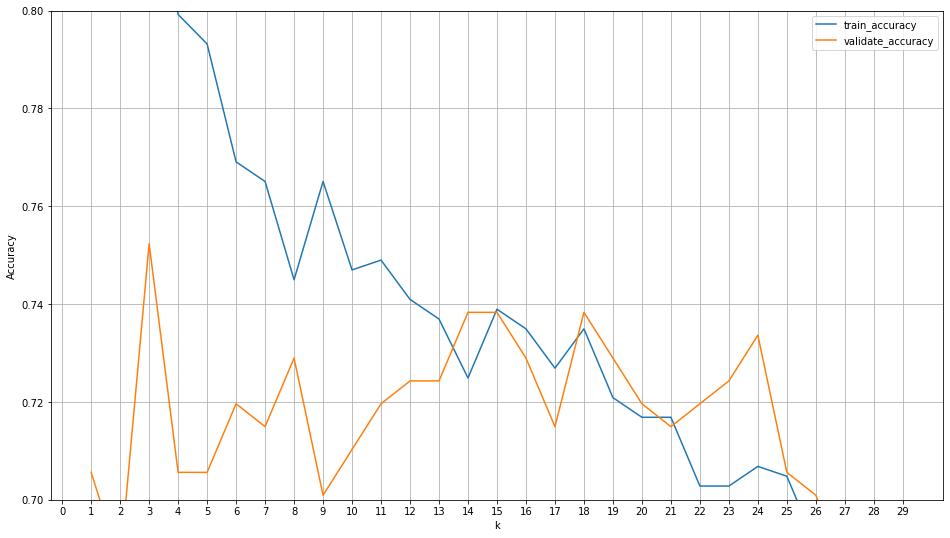

In [141]:
metrics = []

# loop through different values of k
for k in range(1, 30):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylim(0.70, .8)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,30,1))
plt.grid()

In [142]:
# the best fitting models for out of sample data is the data with a k value of 20, although the value for insample
# data is much lower than the other two models.

## LOGISTIC_REGRESSION EXERCISES